In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import torch
import jax
torch.set_default_tensor_type(torch.cuda.FloatTensor)
torch.cuda.set_device(0)

In [6]:
def test_svd_speed(size):
    A=np.random.random([size,size]).astype(np.float32)
    A=A@A.T
    start_time = time.time()
    #s,v=np.linalg.eigh(A)
    s,v=torch.linalg.eigh(torch.tensor(A))
    #s,v=jax.numpy.linalg.eigh(A)
    used_time=time.time()-start_time
    print(size,used_time)
    return used_time

In [7]:
dtsize=[200,500,1000,2000,3000,4000,5000,6000]
dttime=list(map(test_svd_speed,dtsize))

200 0.07332706451416016
500 0.11106061935424805
1000 0.4545753002166748
2000 1.5331096649169922
3000 3.5523085594177246
4000 8.071555614471436
5000 15.135824203491211
6000 22.770400285720825


In [8]:
s=3
p=np.polyfit(np.log(dtsize[s:]),np.log(dttime[s:]),deg=1)
print(np.exp(p[1]),'*','size**',p[0])

dtsize1=[200,500,1000,2000,5000,10000,20000,50000,100000,104976]
dtfit1=np.exp(p[1])*dtsize1**p[0]
for i,j in zip(dtsize1,dtfit1):
    print(i,j)

7.299243997731531e-09 * size** 2.5123589141529026
200 0.004408502615060041
500 0.04406149522509513
1000 0.251393835409191
2000 1.4343330874016427
5000 14.335674944559994
10000 81.79251042392644
20000 466.6689770324905
50000 4664.198867201322
100000 26611.68978371666
104976 30064.788495924342


In [9]:
#pytorch 6000=5.125s 100000=?1292s float64
#jax.numpy 6000=41.05s 100000=?41326s
#numpy 6000=22.77s 11664=148s 20736=603s 100000?=26611s
#pytorch float32 20000=9833MB, 75s

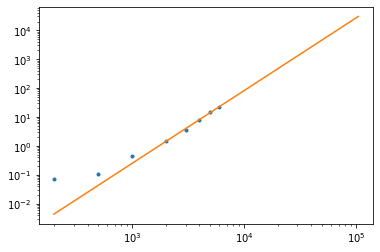

In [10]:
plt.plot(dtsize,dttime,'.')
plt.plot(dtsize1,dtfit1,'-')
plt.xscale('log')
plt.yscale('log')
plt.show()